In [1]:
import matplotlib as mpl
import seaborn.objects as so
from seaborn import axes_style

In [138]:
marker_plot = (
    so.Plot()
    .scale(marker=None, y=so.Continuous().tick(count=0))
    .layout(size=(9, .3), algo=None)
    .theme({
        **axes_style("ticks"),
        "axes.spines.left": False,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "xtick.labelsize":12,
        "axes.xmargin": .02,
    })

)
marker_mark = so.Dot(pointsize=10, color=".15", stroke=1.5)

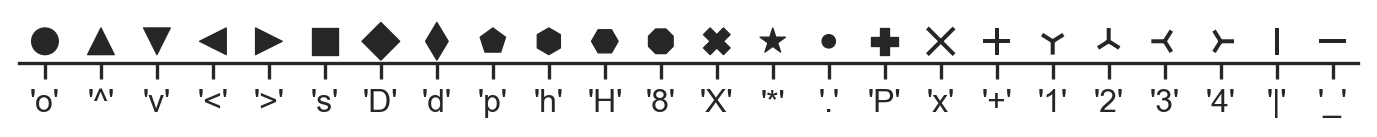

In [148]:
marker_codes = [
    "o", "^", "v", "<", ">","s", "D", "d", "p", "h", "H", "8",
    "X", "*", ".", "P", "x", "+", "1", "2", "3", "4", "|", "_",
]
x, y = [f"'{m}'" for m in marker_codes], [0] * len(marker_codes)
marker_objs = [mpl.markers.MarkerStyle(m) for m in marker_codes]
marker_plot.add(marker_mark, marker=marker_objs, x=x, y=y).plot()

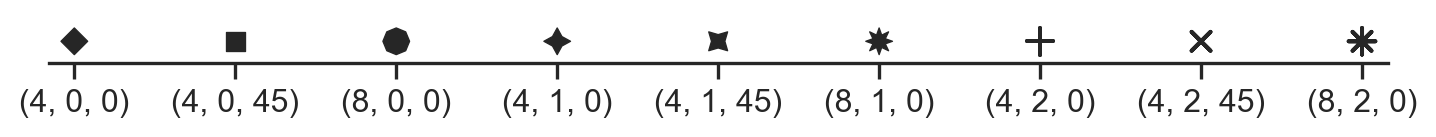

In [150]:
marker_codes = [
    (4, 0, 0), (4, 0, 45), (8, 0, 0),
    (4, 1, 0), (4, 1, 45), (8, 1, 0),
    (4, 2, 0), (4, 2, 45), (8, 2, 0),
]
x, y = [f"{m}" for m in marker_codes], [0] * len(marker_codes)
marker_objs = [mpl.markers.MarkerStyle(m) for m in marker_codes]
marker_plot.add(marker_mark, marker=marker_objs, x=x, y=y).plot()

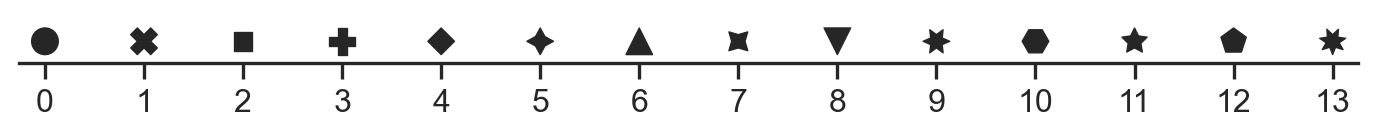

In [152]:
from seaborn._core.properties import Marker
n = 14
marker_objs = Marker()._default_values(n)
x, y = list(map(str, range(n))), [0] * n
marker_plot.add(marker_mark, marker=marker_objs, x=x, y=y).plot()